In [2]:
library(ggplot2)
library(plyr)
library(dplyr)
library(data.table)
library(readxl)
library(tidyr)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(ggsignif) 
library(ggpubr) 
library(reshape2)
library(ggsci) 
library(patchwork)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 
options(repr.plot.width = 6, repr.plot.height = 6)

## read data

In [3]:
#  Multi Region read
meta_multi_region_merged_diversity<-read.csv("meta_multi_region_merged_diversity_IGH.csv",header=TRUE,quote = "\"", skipNul = TRUE,check.names=FALSE)
meta_multi_region_merged_diversity<-meta_multi_region_merged_diversity[meta_multi_region_merged_diversity$Count>=3,]


In [4]:
#BAIDU data read
Trust_cdr3_baidu_merged_diversity<-read.csv("Trust_cdr3_baidu_merged_diversity_IGH.csv",header=TRUE,quote = "\"", skipNul = TRUE,check.names=FALSE)
Trust_cdr3_baidu_merged_diversity$`sample ID`<-sprintf('%03d',Trust_cdr3_baidu_merged_diversity$`sample ID`)

Trust_cdr3_baidu_merged_diversity$V<-str_extract(Trust_cdr3_baidu_merged_diversity$V,pattern = ".*(?=\\*)")
Trust_cdr3_baidu_merged_diversity$J<-str_extract(Trust_cdr3_baidu_merged_diversity$J,pattern = ".*(?=\\*)")

head(Trust_cdr3_baidu_merged_diversity)

,RNA-DataID.exprname,sample ID,RNA-DataID,RNA-DataID.old,WGBS-DataID,WGS-DataID,sRNA-DataID,baibu-id,type,Gender,Age,Location,personal history,Family History of ESCC,Family History of other cancers,Smoking history,Drinking history,Intravascular cancer embolus,Perineural Invasion（PNI）,Intravascular cancer embolus and PNI,TNM_7th,Grade,T,N,M,TNM status,TNM_8th,STATE,recurrence or metastasis,TIME_days,Disease-free Survival time,CIMP subtypes,TIME_month,ID,cohort,count,frequency,CDR3nt,CDR3aa,V,D,J,C,cid,cid_full_length,s_richness,s_shannon,s_clonality,IGHM_proportion_unique,IGHM_proportion_redundant,s_richness_IGHM,s_count_IGHM,IGHD_proportion_unique,IGHD_proportion_redundant,s_richness_IGHD,s_count_IGHD,IGHA1_proportion_unique,IGHA1_proportion_redundant,s_richness_IGHA1,s_count_IGHA1,IGHA2_proportion_unique,IGHA2_proportion_redundant,s_richness_IGHA2,s_count_IGHA2,IGHG1_proportion_unique,IGHG1_proportion_redundant,s_richness_IGHG1,s_count_IGHG1,IGHG2_proportion_unique,IGHG2_proportion_redundant,s_richness_IGHG2,s_count_IGHG2,IGHG3_proportion_unique,IGHG3_proportion_redundant,s_richness_IGHG3,s_count_IGHG3,IGHG4_proportion_unique,IGHG4_proportion_redundant,s_richness_IGHG4,s_count_IGHG4,IGHE_proportion_unique,IGHE_proportion_redundant,s_richness_IGHE,s_count_IGHE
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,R17001923LR01,001,R17001923,R17001923LR01,R17022784LF01,R17025772LD01,R17001923LM01,001N,N,Male,74,Lower,0,0,0,light,light,0,0,0,IIIC,G2,3,3,0,T3N3M0,ⅣA,1,1,265,265,2,8.833333,R17001923LR01,Baidu,23,0.01795764,TGTGCGAGAGGGGTCGTAAGTGGAACTTACGGCATTGACTCCTGG,CARGVVSGTYGIDSW,IGHV3-11,IGHD1-7*01,IGHJ4,IGHA1,assemble9,1,119,2.78799,0.4166314,0.01680672,0.01438849,2,10,0.008403361,0.004316547,1,3,0.4285714,0.4345324,51,302,0.1680672,0.181295,20,126,0.2941176,0.2964029,35,206,0.05042017,0.04028777,6,28,0,0,0,0,0.03361345,0.02877698,4,20,0,0,0,0
2,R17001923LR01,001,R17001923,R17001923LR01,R17022784LF01,R17025772LD01,R17001923LM01,001N,N,Male,74,Lower,0,0,0,light,light,0,0,0,IIIC,G2,3,3,0,T3N3M0,ⅣA,1,1,265,265,2,8.833333,R17001923LR01,Baidu,19,0.01437216,TGTACGAAAGACCCTCGTGTAGCAACAGTCAATGTCCGGTTCGACCCCTGG,CTKDPRVATVNVRFDPW,IGHV3-23,IGHD6-13*01,IGHJ5,IGHA2,assemble34,0,119,2.78799,0.4166314,0.01680672,0.01438849,2,10,0.008403361,0.004316547,1,3,0.4285714,0.4345324,51,302,0.1680672,0.181295,20,126,0.2941176,0.2964029,35,206,0.05042017,0.04028777,6,28,0,0,0,0,0.03361345,0.02877698,4,20,0,0,0,0
3,R17001923LR01,001,R17001923,R17001923LR01,R17022784LF01,R17025772LD01,R17001923LM01,001N,N,Male,74,Lower,0,0,0,light,light,0,0,0,IIIC,G2,3,3,0,T3N3M0,ⅣA,1,1,265,265,2,8.833333,R17001923LR01,Baidu,16,0.01232980,TGTGCGAGAGATCTGACTGCAACTACATCGAGGGGGGACTACTATTATTACGGCATGGACGTCTGG,CARDLTATTSRGDYYYYGMDVW,IGHV4-59,IGHD1-7*01,IGHJ6,IGHA1,assemble2609,1,119,2.78799,0.4166314,0.01680672,0.01438849,2,10,0.008403361,0.004316547,1,3,0.4285714,0.4345324,51,302,0.1680672,0.181295,20,126,0.2941176,0.2964029,35,206,0.05042017,0.04028777,6,28,0,0,0,0,0.03361345,0.02877698,4,20,0,0,0,0
4,R17001923LR01,001,R17001923,R17001923LR01,R17022784LF01,R17025772LD01,R17001923LM01,001N,N,Male,74,Lower,0,0,0,light,light,0,0,0,IIIC,G2,3,3,0,T3N3M0,ⅣA,1,1,265,265,2,8.833333,R17001923LR01,Baidu,16,0.01210287,TGTGTTAGAGACTACGGTGACTACATGAATTGGTTCGAGTCCTGG,CVRDYGDYMNWFESW,IGHV3-49,IGHD4-17*01,IGHJ5,IGHA1,assemble59,0,119,2.78799,0.4166314,0.01680672,0.01438849,2,10,0.008403361,0.004316547,1,3,0.4285714,0.4345324,51,302,0.1680672,0.181295,20,126,0.2941176,0.2964029,35,206,0.05042017,0.04028777,6,28,0,0,0,0,0.03361345,0.02877698,4,20

In [5]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 0.3)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.3)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)
mypal[3]<-"#FFBD7A"


## 百度VJ分析

In [6]:
#VJ alleles - by sample ID
baidu_cdr3_VJ_ID<-Trust_cdr3_baidu_merged_diversity[,c('CDR3aa','V','J','C','type','baibu-id')]

#已经去掉了allele
#baidu_cdr3_VJ_ID$V<-str_extract(baidu_cdr3_VJ_ID$V,pattern = ".*(?=\\*)")
#baidu_cdr3_VJ_ID$J<-str_extract(baidu_cdr3_VJ_ID$J,pattern = ".*(?=\\*)")

baidu_cdr3_VJ_ID$ID<-baidu_cdr3_VJ_ID$`baibu-id`
head(baidu_cdr3_VJ_ID)

,CDR3aa,V,J,C,type,baibu-id,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CARGVVSGTYGIDSW,IGHV3-11,IGHJ4,IGHA1,N,001N,001N
2,CTKDPRVATVNVRFDPW,IGHV3-23,IGHJ5,IGHA2,N,001N,001N
3,CARDLTATTSRGDYYYYGMDVW,IGHV4-59,IGHJ6,IGHA1,N,001N,001N
4,CVRDYGDYMNWFESW,IGHV3-49,IGHJ5,IGHA1,N,001N,001N
5,CAKDRDYGDYRSAFFDSW,IGHV3-30,IGHJ4,IGHA1,N,001N,001N
6,CARDRHYSSDIYYEYYFAMDVW,IGHV3-33,IGHJ4,IGHG1,N,001N,001N


### 只用BD大于1/1000的VJ

In [7]:

IGHV_genes<-Trust_cdr3_baidu_merged_diversity$V %>% table() %>% prop.table()
high_freq_IGHVs_MR<-names(IGHV_genes)[IGHV_genes>0.01][-1] #select 0.1%+ V genes

IGHJ_genes<-Trust_cdr3_baidu_merged_diversity$J %>% table() %>% prop.table()
#high_freq_IGHJs_MR<-names(IGHJ_genes)[IGHJ_genes>0.001][-1] #select 0.1%+ J genes

baidu_cdr3_VJ_ID$V[!baidu_cdr3_VJ_ID$V %in% high_freq_IGHVs_MR]<-"Others"
#baidu_cdr3_VJ_ID$J[!baidu_cdr3_VJ_ID$J %in% high_freq_IGHJs_MR]<-"Others"


## Fig2B

### BD V gene

In [8]:
library(ggpubr)
library(rstatix)
library(reshape2)

#IGH_Roe_mat<-table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$type) #count  Reo
IGH_Roe_mat<-prop.table(table(baidu_cdr3_VJ_ID$V,baidu_cdr3_VJ_ID$ID),margin=2)#frequency to calc Reo

#IGH_Roe_mat<-IGH_Roe_mat[high_freq_IGHVs,]
#dim(IGH_Roe_mat)
## 各病人的V基因使用箱型图

IGH_Roe_mat_long<-melt(IGH_Roe_mat,value.name="Frequency")
colnames(IGH_Roe_mat_long)<-c("V_Genes","ID","Frequency")

IGH_Roe_mat_long$type<-str_sub(IGH_Roe_mat_long$ID,4,4)

IGH_Roe_mat_long$type<-factor(IGH_Roe_mat_long$type, levels = c("T","N"))

#增加P值，参考：https://www.datanovia.com/en/blog/how-to-add-p-values-onto-a-grouped-ggplot-using-the-ggpubr-r-package/
stat.test <- IGH_Roe_mat_long[,-2] %>%
  group_by(V_Genes) %>%
  wilcox_test(Frequency ~ type) %>%
  #adjust_pvalue(method = "BH") %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")

stat.test <- stat.test %>%
  add_xy_position(x = "V_Genes", dodge = 0.8)

head(stat.test)




载入程辑包：'rstatix'


The following objects are masked from 'package:plyr':

    desc, mutate


The following object is masked from 'package:stats':

    filter




V_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHV1-2,Frequency,T,N,155,155,13001.0,2.10e-01,1.000e+00,ns,0.1794,"T, N",1,0.8,1.2
IGHV1-3,Frequency,T,N,155,155,13772.5,2.57e-02,7.453e-01,ns,0.1654,"T, N",2,1.8,2.2
IGHV1-46,Frequency,T,N,155,155,13407.5,7.72e-02,1.000e+00,ns,0.2224,"T, N",3,2.8,3.2
IGHV1-69,Frequency,T,N,155,155,17031.0,2.03e-10,5.887e-09,****,0.2394,"T, N",4,3.8,4.2
IGHV1-8,Frequency,T,N,155,155,12857.0,2.85e-01,1.000e+00,ns,0.2734,"T, N",5,4.8,5.2
IGHV2-5,Frequency,T,N,155,155,11579.0,5.83e-01,1.000e+00,ns,0.1464,"T, N",6,5.8,6.2


In [11]:
IGH_Roe_mat_long[1:3,]

write.csv(IGH_Roe_mat_long,"Fig2B.csv",row.names=FALSE,quote=FALSE)

,V_Genes,ID,Frequency,type
,<fct>,<fct>,<dbl>,<fct>
1,IGHV1-2,001N,0.000000000,N
2,IGHV1-3,001N,0.008403361,N
3,IGHV1-46,001N,0.025210084,N


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


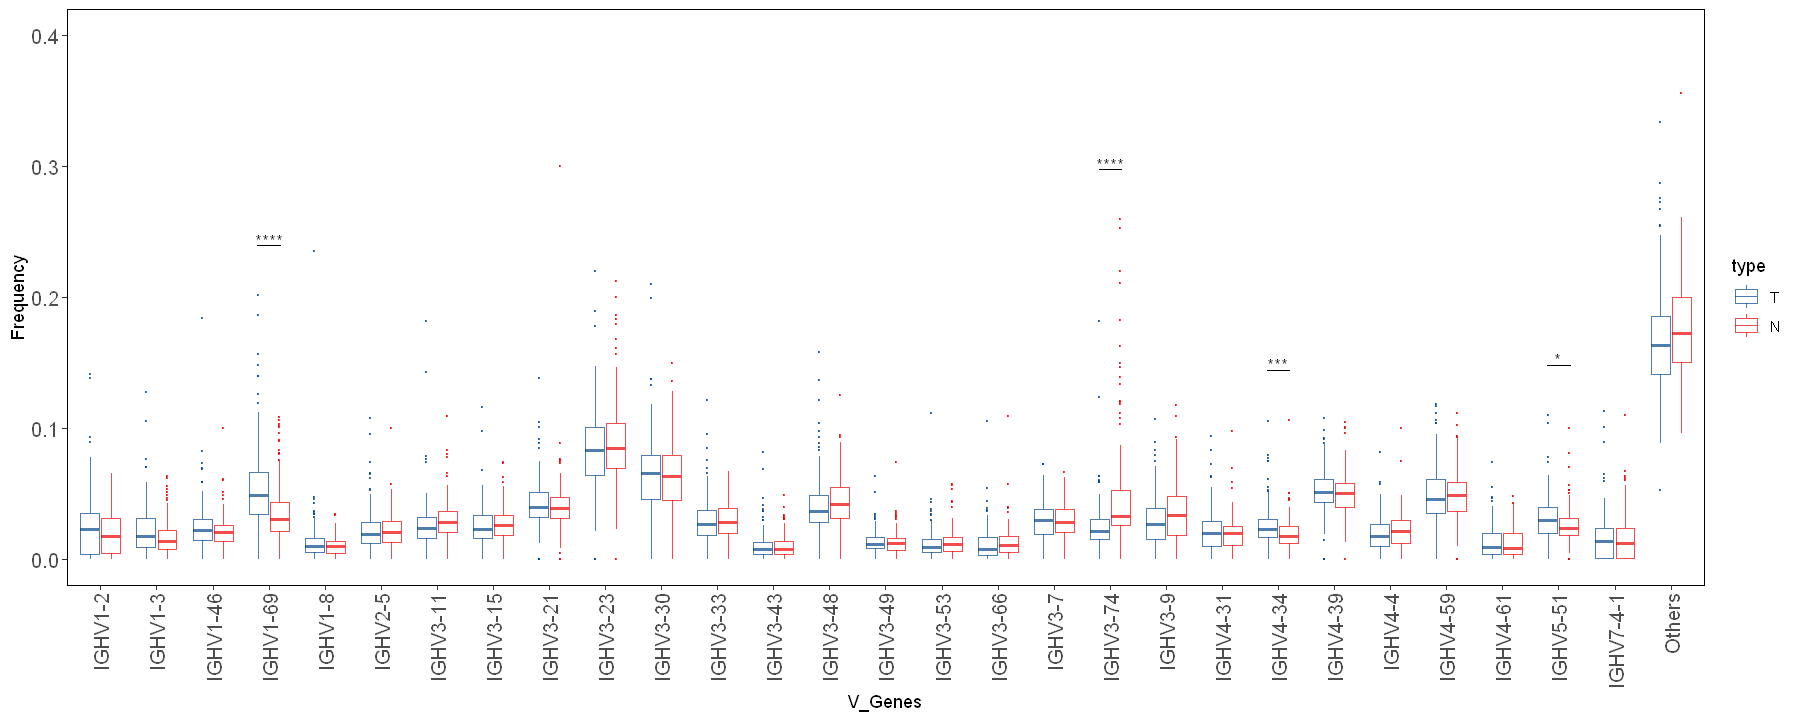

In [9]:
options(repr.plot.width = 15, repr.plot.height = 6)

g_v<-ggplot(IGH_Roe_mat_long,aes(x=V_Genes,y=Frequency,col=type))+
    geom_boxplot(outlier.size = .1)+
        #geom_signif(comparisons = list(c("T", "N")),
        #      map_signif_level=T,
        #      textsize=5,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02) +
    theme_classic()+
    #labs(x='CDR3 Length',y='Proportion')+
    scale_color_manual(values=mypal)+
    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5))+
    theme(axis.text=element_text(size=12))+
    ylim(0,0.4)+
    stat_pvalue_manual( stat.test,  label = "p.adj.signif", hide.ns = TRUE,tip.length = 0 )

g_v

## Fig2D

### BD J gene

In [12]:

#IGH_Roe_mat<-table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$type) #count  Reo
IGH_Roe_mat<-prop.table(table(baidu_cdr3_VJ_ID$J,baidu_cdr3_VJ_ID$ID),margin=2)#frequency to calc Reo

#IGH_Roe_mat<-IGH_Roe_mat[high_freq_IGHVs,]
#dim(IGH_Roe_mat)
## 各病人的V基因使用箱型图

IGH_Roe_mat_long<-melt(IGH_Roe_mat,value.name="Frequency")
colnames(IGH_Roe_mat_long)<-c("J_Genes","ID","Frequency")

IGH_Roe_mat_long$type<-str_sub(IGH_Roe_mat_long$ID,4,4)

IGH_Roe_mat_long$type<-factor(IGH_Roe_mat_long$type, levels = c("T","N"))

#增加P值，参考：https://www.datanovia.com/en/blog/how-to-add-p-values-onto-a-grouped-ggplot-using-the-ggpubr-r-package/
stat.test <- IGH_Roe_mat_long[,-2] %>%
  group_by(J_Genes) %>%
  wilcox_test(Frequency ~ type) %>%
  #adjust_pvalue(method = "BH") %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")

stat.test <- stat.test %>%
  add_xy_position(x = "J_Genes", dodge = 0.8)

head(stat.test)

options(repr.plot.width = 3.5, repr.plot.height = 4)
g_j<-ggplot(IGH_Roe_mat_long,aes(x=J_Genes,y=Frequency,col=type))+
    geom_boxplot(width=0.3,outlier.size = .1)+
        #geom_signif(comparisons = list(c("T", "N")),
        #      map_signif_level=T,
        #      textsize=5,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02) +
    theme_classic()+
    #labs(x='CDR3 Length',y='Proportion')+
    scale_color_manual(values=mypal)+
    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5))+
    theme(axis.text=element_text(size=12))+
    ylim(0,1)+
    stat_pvalue_manual( stat.test,  label = "p.adj.signif", hide.ns = TRUE,tip.length = 0 )


J_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHJ1,Frequency,T,N,155,155,11645.0,6.42e-01,1.000e+00,ns,0.17932,"T, N",1,0.8,1.2
IGHJ2,Frequency,T,N,155,155,9858.0,6.34e-03,3.804e-02,*,0.17932,"T, N",2,1.8,2.2
IGHJ3,Frequency,T,N,155,155,11762.0,7.51e-01,1.000e+00,ns,0.33832,"T, N",3,2.8,3.2
IGHJ4,Frequency,T,N,155,155,8980.5,1.22e-04,7.320e-04,***,0.87032,"T, N",4,3.8,4.2
IGHJ5,Frequency,T,N,155,155,9171.5,3.19e-04,1.914e-03,**,0.34832,"T, N",5,4.8,5.2
IGHJ6,Frequency,T,N,155,155,16863.0,7.93e-10,4.758e-09,****,0.50332,"T, N",6,5.8,6.2


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [13]:
IGH_Roe_mat_long[1:3,]

,J_Genes,ID,Frequency,type
,<fct>,<fct>,<dbl>,<fct>
1,IGHJ1,001N,0.00000000,N
2,IGHJ2,001N,0.01680672,N
3,IGHJ3,001N,0.09243697,N


In [14]:
write.csv(IGH_Roe_mat_long,"Fig2D.csv",row.names=FALSE,quote=FALSE)

null device 
          1

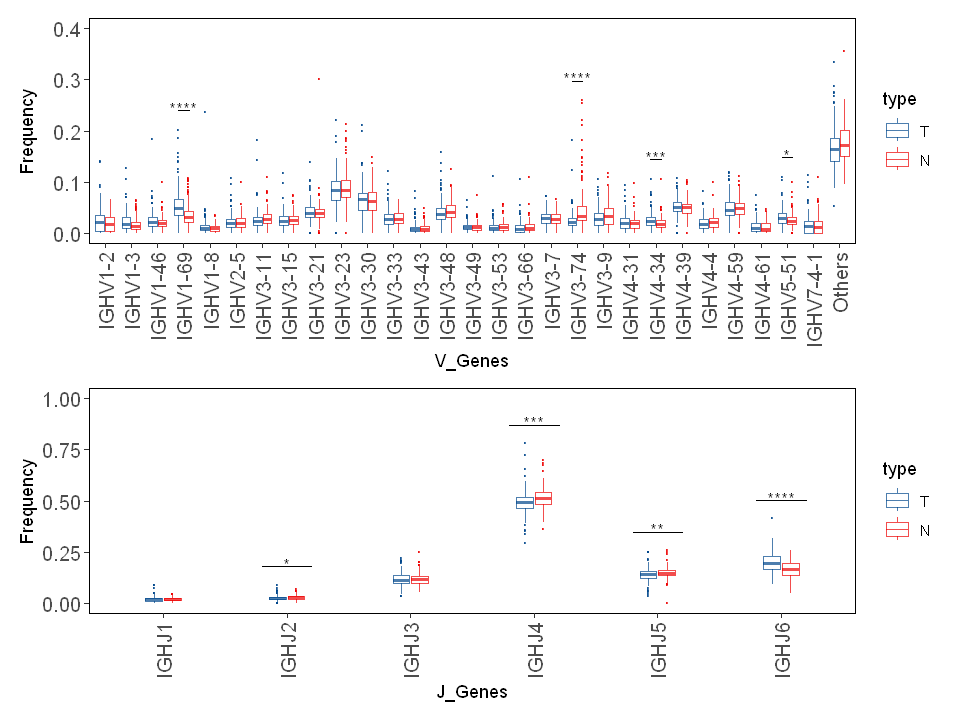

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
#pdf("Fig2.Baidu.V_gene_usage_boxplot.pdf",8,6)
g_v+g_j+plot_layout(nrow=2)
dev.off()

# 二、 MR的VJ分析

#### select the high freq V J genes in both cohort
## MR V/J 基因使用分析及p值检验

使用BD和MR都大于1/1000的VJ

In [15]:
IGHV_genes<-str_replace(meta_multi_region_merged_diversity$V, pattern='\\*\\d\\d',replacement="") %>% table() %>% prop.table()
high_freq_IGHVs_MR<-names(IGHV_genes)[IGHV_genes>0.001][-1] #select 1%+ V genes


IGHV_genes<-str_replace(Trust_cdr3_baidu_merged_diversity$V, pattern='\\*\\d\\d',replacement="") %>% table() %>% prop.table()
high_freq_IGHVs_BD<-names(IGHV_genes)[IGHV_genes>0.001][-1] #select 1%+ V genes

high_freq_IGHVs<-intersect(high_freq_IGHVs_MR,high_freq_IGHVs_BD)
IGHJ_genes<-str_replace(meta_multi_region_merged_diversity$J, pattern='\\*\\d\\d',replacement="") %>% table() %>% prop.table()
high_freq_IGHJs<-names(IGHJ_genes)[IGHJ_genes>0.001][-1] #select 1%+ V genes
baidu_cdr3_VJ_type$V[!baidu_cdr3_VJ_type$V %in% high_freq_IGHVs]<-"Others"
multi_region_cdr3_VJ_type$V[!multi_region_cdr3_VJ_type$V %in% high_freq_IGHVs]<-"Others"

ERROR: Error in baidu_cdr3_VJ_type$V[!baidu_cdr3_VJ_type$V %in% high_freq_IGHVs] <- "Others": 找不到对象'baidu_cdr3_VJ_type'


## 2.1 只用MR大于1/100的VJ

In [16]:
meta_multi_region_merged_diversity<-read.csv("meta_multi_region_merged_diversity_IGH.csv",header=TRUE,quote = "\"", skipNul = TRUE,check.names=FALSE)

#meta_multi_region_merged_diversity$V<-str_extract(meta_multi_region_merged_diversity$V,pattern = ".*(?=\\*)")
#meta_multi_region_merged_diversity$J<-str_extract(meta_multi_region_merged_diversity$J,pattern = ".*(?=\\*)")
head(meta_multi_region_merged_diversity)

meta_multi_region_merged_diversity<-meta_multi_region_merged_diversity[meta_multi_region_merged_diversity$V!="." & meta_multi_region_merged_diversity$J != ".",]
multi_region_cdr3_VJ_type<-meta_multi_region_merged_diversity[,c('CDR3aa','V','J','C','type','ID')]

,Patient_ID,Gender,Age,Location,Smoking_status,Drinking_status,T,N,M,TNM,Tumor_grade,Lymphatic_metastasis,Surgery_date,Follow-up_date,Followup_death_date1,Death_date,Survival_status,Survival_time,Chemotherapy,Radiotherapy,Other_therapy,ID,Cohort,Count,Frequency,CDR3nt,CDR3aa,V,D,J,C,cid,cid_full_length,type,s_richness,s_shannon,s_clonality,IGHM_proportion_unique,IGHM_proportion_redundant,s_richness_IGHM,s_count_IGHM,IGHD_proportion_unique,IGHD_proportion_redundant,s_richness_IGHD,s_count_IGHD,IGHA1_proportion_unique,IGHA1_proportion_redundant,s_richness_IGHA1,s_count_IGHA1,IGHA2_proportion_unique,IGHA2_proportion_redundant,s_richness_IGHA2,s_count_IGHA2,IGHG1_proportion_unique,IGHG1_proportion_redundant,s_richness_IGHG1,s_count_IGHG1,IGHG2_proportion_unique,IGHG2_proportion_redundant,s_richness_IGHG2,s_count_IGHG2,IGHG3_proportion_unique,IGHG3_proportion_redundant,s_richness_IGHG3,s_count_IGHG3,IGHG4_proportion_unique,IGHG4_proportion_redundant,s_richness_IGHG4,s_count_IGHG4,IGHE_proportion_unique,IGHE_proportion_redundant,s_richness_IGHE,s_count_IGHE
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,17,0.08947368,TGTGCGAGACAAACACACTCACGTTTTTCGTGGAGGGACCTCTACGGTTTGGACGTCTGG,CARQTHSRFSWRDLYGLDVW,IGHV4-39*01,IGHD3-10*01,IGHJ4*02,IGHG1,assemble2,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
2,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,9,0.04736842,TGTGCGAGACGCCGGACGTATAACTGGAACGACCGGTACTTTGACTACTGG,CARRRTYNWNDRYFDYW,IGHV4-59*01,IGHD1-20*01,IGHJ4*02,IGHM,assemble12,1,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
3,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,8,0.04210526,TGTGCGAGACATGAGCGTCAGAAACGGGGGTGGATACCAGCTGCCCCTCGGTTCGACCCCTGG,CARHERQKRGWIPAAPRFDPW,IGHV4-39*01,IGHD5-18*01,IGHJ5*02,IGHA1,assemble3,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
4,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,6,0.03157895,TGTGGTAGACATAAACCCCACCTCCTAGGGGTACTGGTGGTCGCTGCTACTGCATTTGACTACTGG,CGRHKPHLLGVLVVAATAFDYW,IGHV4-39*01,IGHD2-15*01,IGHJ4*02,IGHA1,assemble141,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
5,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,6,0.03157895,TGTGCGAGAGATGCATCCCGGTTCGACCCCTGG,CARDASRFDPW,IGHV4-59*01,IGHD5-24*01,IGHJ5*02,IGHA1,assemble1310,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
6,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,5,0.02631579,TGTGCGAGGTCCAGTAGAGCAGCTGGACTCGACCGCGTATGGAAGGGTTTCTACTACTACTACTACATGGACGTCTGG,CARSSRAAGLDRVWKGFYYYYYMDVW,IGHV3-11*06,IGHD6-6*01,IGHJ6*04,IGHM,assemble362,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
IGHV_genes<-str_replace(meta_multi_region_merged_diversity$V, pattern='\\*\\d\\d',replacement="") %>% table() %>% prop.table()
high_freq_IGHVs_MR<-names(IGHV_genes)[IGHV_genes>0.01] #select 0.1%+ V genes

#V 基因去除alleles
multi_region_cdr3_VJ_type$V<-str_replace(meta_multi_region_merged_diversity$V, pattern='\\*\\d\\d',replacement="")
multi_region_cdr3_VJ_type$V[!multi_region_cdr3_VJ_type$V %in% high_freq_IGHVs_MR]<-"Others"

#J 基因去除alleles
multi_region_cdr3_VJ_type$J<-str_replace(meta_multi_region_merged_diversity$J, pattern='\\*\\d\\d',replacement="")


### 2.1.1 计算各个V基因的P值

In [18]:
library(rstatix)
#IGH_Roe_mat<-table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$type) #count  Reo
IGH_Roe_mat<-prop.table(table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$ID),margin=2)#frequency to calc Reo

#IGH_Roe_mat<-IGH_Roe_mat[high_freq_IGHVs,]
#dim(IGH_Roe_mat)
## 各病人的V基因使用箱型图
library(reshape2)
IGH_Roe_mat_long<-melt(IGH_Roe_mat,value.name="Frequency")
colnames(IGH_Roe_mat_long)<-c("V_Genes","ID","Frequency")

IGH_Roe_mat_long$type<-str_sub(IGH_Roe_mat_long$ID,8,8)

IGH_Roe_mat_long$type<-factor(IGH_Roe_mat_long$type, levels = c("T","N","L"))

#增加P值，参考：https://www.datanovia.com/en/blog/how-to-add-p-values-onto-a-grouped-ggplot-using-the-ggpubr-r-package/
stat.test <- IGH_Roe_mat_long[,-2] %>%
  group_by(V_Genes) %>%
  wilcox_test(Frequency ~ type) %>%
  #adjust_pvalue(method = "BH") %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")

stat.test <- stat.test %>%
  add_xy_position(x = "V_Genes", dodge = 0.8)

head(stat.test)


V_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHV1-18,Frequency,T,N,496,107,27844.5,0.424,1.000,ns,0.614,"T, N",1,0.7333333,1.000000
IGHV1-18,Frequency,T,L,496,48,11042.0,0.407,1.000,ns,0.785,"T, L",1,0.7333333,1.266667
IGHV1-18,Frequency,N,L,107,48,2242.5,0.208,1.000,ns,0.956,"N, L",1,1.0000000,1.266667
IGHV1-2,Frequency,T,N,496,107,30966.5,0.006,0.486,ns,0.447,"T, N",2,1.7333333,2.000000
IGHV1-2,Frequency,T,L,496,48,11788.5,0.911,1.000,ns,0.618,"T, L",2,1.7333333,2.266667
IGHV1-2,Frequency,N,L,107,48,2051.5,0.042,1.000,ns,0.789,"N, L",2,2.0000000,2.266667


In [19]:
#IGH_Roe_mat<-table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$type) #count  Reo
IGH_Roe_mat<-prop.table(table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$ID),margin=2)#frequency to calc Reo

#IGH_Roe_mat<-IGH_Roe_mat[high_freq_IGHVs,]
#dim(IGH_Roe_mat)
## 各病人的V基因使用箱型图
library(reshape2)
IGH_Roe_mat_long<-melt(IGH_Roe_mat,value.name="Frequency")
colnames(IGH_Roe_mat_long)<-c("V_Genes","ID","Frequency")

IGH_Roe_mat_long$type<-str_sub(IGH_Roe_mat_long$ID,8,8)

IGH_Roe_mat_long$type<-factor(IGH_Roe_mat_long$type, levels = c("T","N","L"))

#增加P值，参考：https://www.datanovia.com/en/blog/how-to-add-p-values-onto-a-grouped-ggplot-using-the-ggpubr-r-package/
stat.test <- IGH_Roe_mat_long[,-2] %>%
  group_by(V_Genes) %>%
  wilcox_test(Frequency ~ type) %>%
  #adjust_pvalue(method = "BH") %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")

stat.test <- stat.test %>%
  add_xy_position(x = "V_Genes", dodge = 0.8)

head(stat.test)


V_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHV1-18,Frequency,T,N,496,107,27844.5,0.424,1.000,ns,0.614,"T, N",1,0.7333333,1.000000
IGHV1-18,Frequency,T,L,496,48,11042.0,0.407,1.000,ns,0.785,"T, L",1,0.7333333,1.266667
IGHV1-18,Frequency,N,L,107,48,2242.5,0.208,1.000,ns,0.956,"N, L",1,1.0000000,1.266667
IGHV1-2,Frequency,T,N,496,107,30966.5,0.006,0.486,ns,0.447,"T, N",2,1.7333333,2.000000
IGHV1-2,Frequency,T,L,496,48,11788.5,0.911,1.000,ns,0.618,"T, L",2,1.7333333,2.266667
IGHV1-2,Frequency,N,L,107,48,2051.5,0.042,1.000,ns,0.789,"N, L",2,2.0000000,2.266667


## Fig2A

### 2.1.2 V基因作图

In [21]:
IGH_Roe_mat_long[1:3,]
write.csv(IGH_Roe_mat_long,"Fig2A.csv",row.names=FALSE,quote=FALSE)


,V_Genes,ID,Frequency,type
,<fct>,<fct>,<dbl>,<fct>
1,IGHV1-18,ESCC001N,0.07142857,N
2,IGHV1-2,ESCC001N,0.00000000,N
3,IGHV1-3,ESCC001N,0.00000000,N


Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."


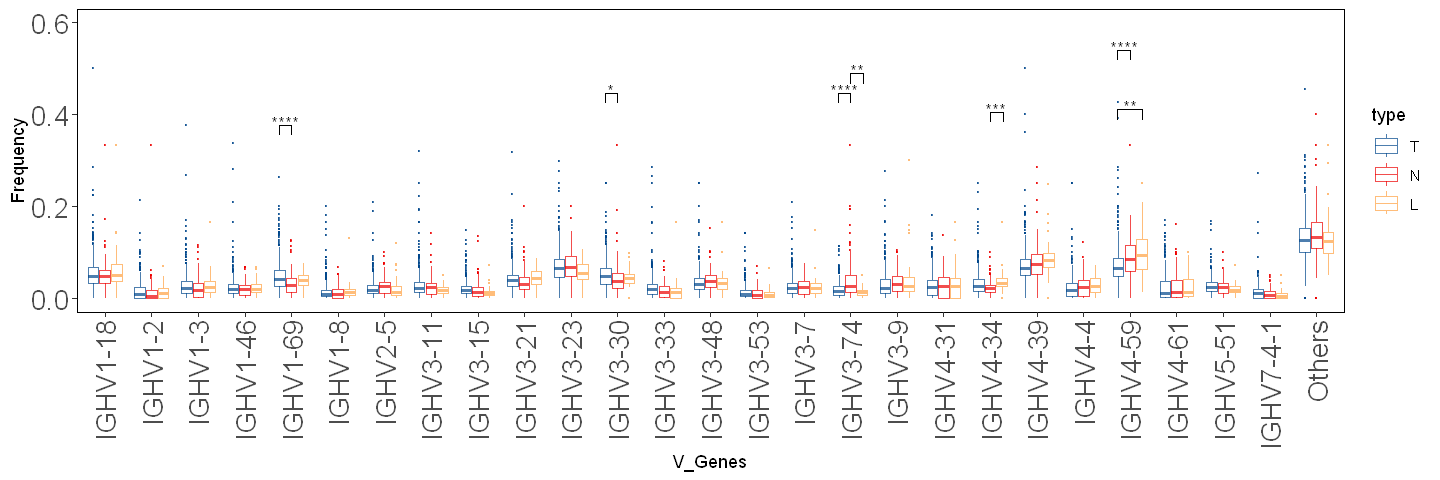

In [19]:
stat.test1<-stat.test[stat.test$p.adj.signif!="ns",]

stat.test1$y.position[stat.test1$y.position > 0.7]<-stat.test1$y.position[stat.test1$y.position > 0.7]-0.3
stat.test1$y.position[stat.test1$y.position < 0.2]<-stat.test1$y.position[stat.test1$y.position < 0.2]+0.2

options(repr.plot.width = 12, repr.plot.height = 4)
g_v<-ggplot(IGH_Roe_mat_long,aes(x=V_Genes,y=Frequency,col=type))+
    geom_boxplot(outlier.size = .1)+
    theme_classic()+
    #labs(x='CDR3 Length',y='Proportion')+
    scale_color_manual(values=mypal)+
    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5))+
    theme(axis.text=element_text(size=16))+
    stat_pvalue_manual( stat.test1,  label = "p.adj.signif",hide.ns = TRUE, tip.length = 0.02 )+
    ylim(0,0.6)

g_v

### 2.1.3 计算各个J基因的P值

In [22]:
#IGH_Roe_mat<-table(multi_region_cdr3_VJ_type$V,multi_region_cdr3_VJ_type$type) #count  Reo
IGH_Roe_mat<-prop.table(table(multi_region_cdr3_VJ_type$J,multi_region_cdr3_VJ_type$ID),margin=2)#frequency to calc Reo

#IGH_Roe_mat<-IGH_Roe_mat[high_freq_IGHVs,]
#dim(IGH_Roe_mat)
## 各病人的J基因使用箱型图
library(reshape2)
IGH_Roe_mat_long<-melt(IGH_Roe_mat,value.name="Frequency")
colnames(IGH_Roe_mat_long)<-c("J_Genes","ID","Frequency")

IGH_Roe_mat_long$type<-str_sub(IGH_Roe_mat_long$ID,8,8)

IGH_Roe_mat_long$type<-factor(IGH_Roe_mat_long$type, levels = c("T","N","L"))

#增加P值，参考：https://www.datanovia.com/en/blog/how-to-add-p-values-onto-a-grouped-ggplot-using-the-ggpubr-r-package/
stat.test <- IGH_Roe_mat_long[,-2] %>%
  group_by(J_Genes) %>%
  wilcox_test(Frequency ~ type) %>%
  #adjust_pvalue(method = "BH") %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")

stat.test <- stat.test %>%
  add_xy_position(x = "J_Genes", dodge = 0.8)

head(stat.test)


J_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHJ1,Frequency,T,N,496,107,27919.5,0.397,1,ns,0.35932,"T, N",1,0.7333333,1.000000
IGHJ1,Frequency,T,L,496,48,12918.0,0.329,1,ns,0.52330,"T, L",1,0.7333333,1.266667
IGHJ1,Frequency,N,L,107,48,2592.5,0.926,1,ns,0.68728,"N, L",1,1.0000000,1.266667
IGHJ2,Frequency,T,N,496,107,23759.5,0.089,1,ns,0.60932,"T, N",2,1.7333333,2.000000
IGHJ2,Frequency,T,L,496,48,11307.5,0.566,1,ns,0.77330,"T, L",2,1.7333333,2.266667
IGHJ2,Frequency,N,L,107,48,2699.0,0.613,1,ns,0.93728,"N, L",2,2.0000000,2.266667


## Fig2C

### 2.1.4 J 基因作图

In [23]:
IGH_Roe_mat_long[1:3,]
write.csv(IGH_Roe_mat_long,"Fig2C.csv",row.names=FALSE,quote=FALSE)


,J_Genes,ID,Frequency,type
,<fct>,<fct>,<dbl>,<fct>
1,IGHJ1,ESCC001N,0.00000000,N
2,IGHJ2,ESCC001N,0.07142857,N
3,IGHJ3,ESCC001N,0.07142857,N


In [21]:
stat.test1<-stat.test[stat.test$p.adj.signif!="ns",]
head(stat.test1)
stat.test1$y.position[stat.test1$y.position > 0.7]<-stat.test1$y.position[stat.test1$y.position > 0.7]-0.1

options(repr.plot.width = 5, repr.plot.height = 4)
g_j<-ggplot(IGH_Roe_mat_long,aes(x=J_Genes,y=Frequency,col=type))+
    geom_boxplot(outlier.size = .1)+
    theme_classic()+
    #labs(x='CDR3 Length',y='Proportion')+
    scale_color_manual(values=mypal)+
    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5))+
    theme(axis.text=element_text(size=16))+
    stat_pvalue_manual( stat.test1,  label = "p.adj.signif",hide.ns = TRUE, tip.length = 0.02 )+
    ylim(0,0.9)

J_Genes,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
IGHJ6,Frequency,T,N,496,107,33502,2.03e-05,0.0003654,***,0.77632,"T, N",6,5.733333,6


Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."


png 
  2

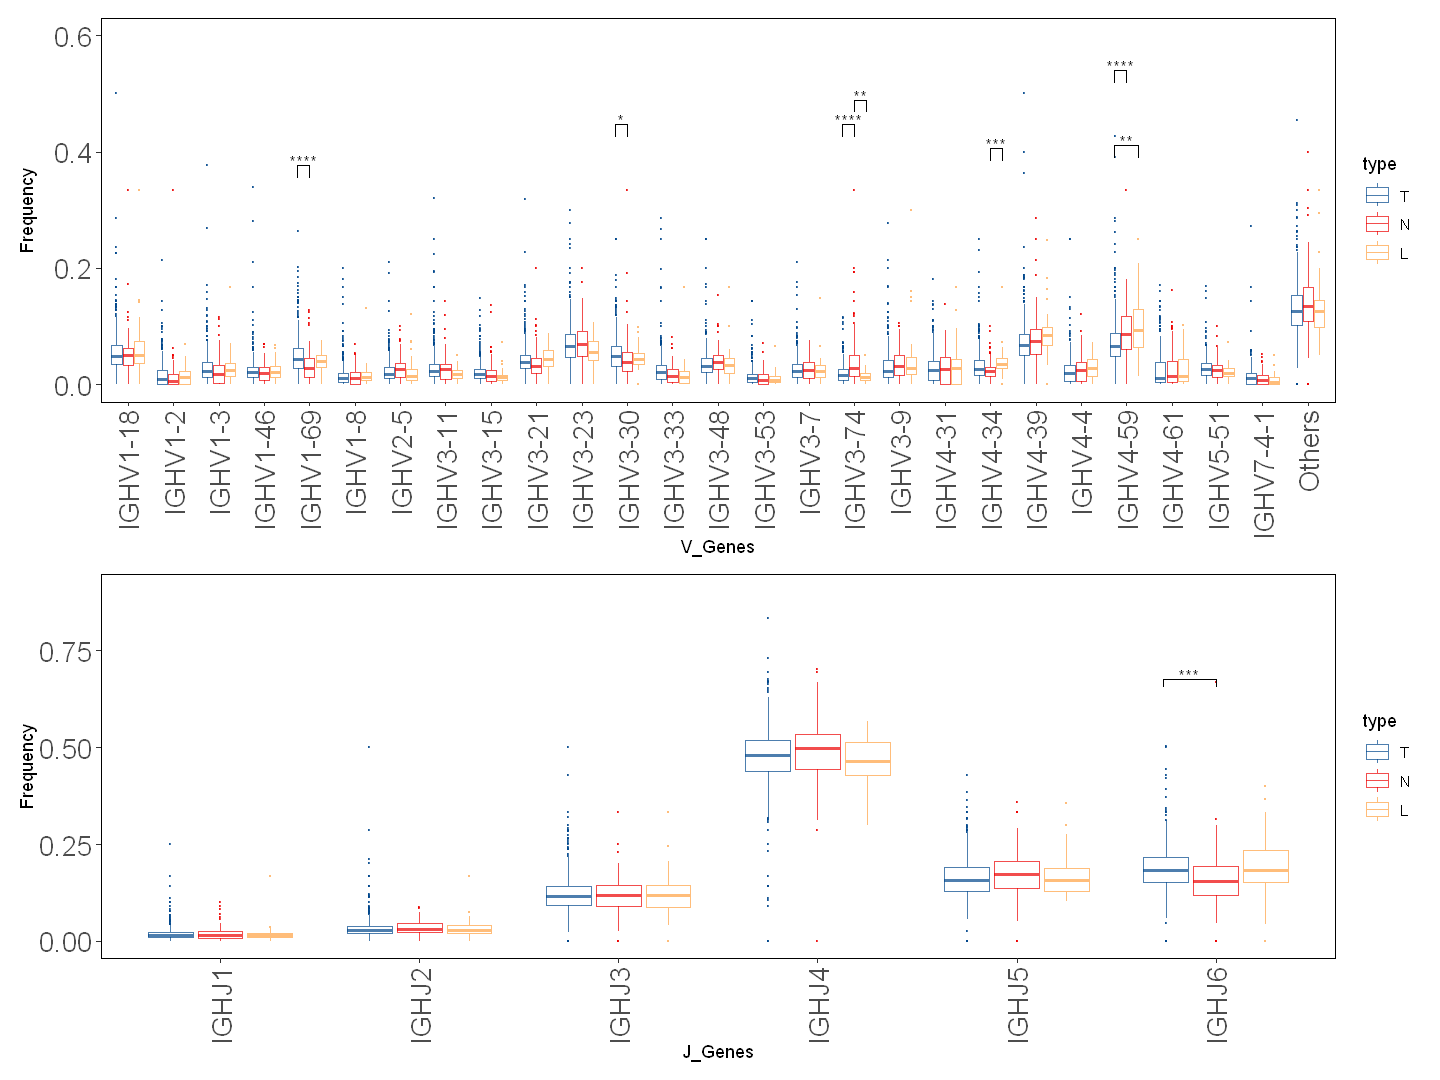

In [23]:
options(repr.plot.width = 12  , repr.plot.height = 9)
g_v+g_j+plot_layout(nrow=2)
pdf("Fig2.VJ_MR_usage.pdf",8,6)
g_v+g_j+plot_layout(nrow=2)
dev.off()